# INTRODUÇÃO

Perguntas de negócios a serem respondidas:

-Quais são os produtos mais comprados por mulheres e por homens?

-Quais são os produtos mais vendidos?

-Qual é o perfil dos clientes mais frequentes?

-Qual é o desempenho de vendas por filial e cidade?

-Qual é o horário de pico das vendas?

-Como as vendas variam ao longo do tempo?

-Quais métodos de pagamento são mais populares?

-Como o tipo de cliente afeta a receita média por venda?

In [2]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Carregando arquivo
df = pd.read_csv('supermarket_sales.csv')

# Informações Básicas dos Dados/Limpeza dos Dados

In [4]:
df.shape

(1000, 17)

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [7]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [9]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# 1.Quais são os produtos mais comprados por mulheres e por homens?


In [10]:
df1 = df.groupby(['Gender', 'Product line'])['Quantity'].sum().reset_index()
df_male = df1.loc[(df1['Gender'] == 'Male')]
df_female = df1.loc[(df1['Gender'] == 'Female')]


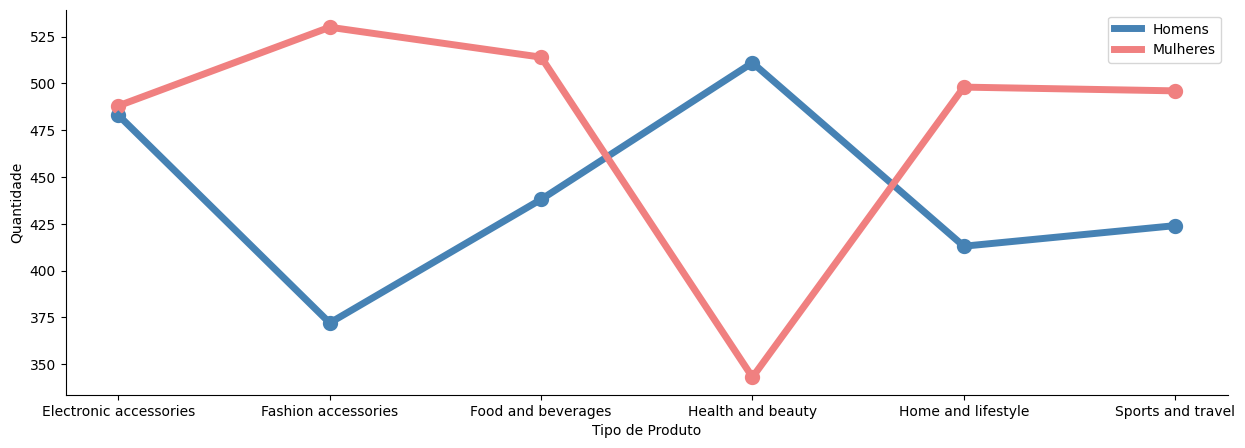

In [11]:
fig = plt.figure(figsize=(15,5))

plt.plot(df_male['Product line'],
         df_male['Quantity'], 
         color = 'steelblue',
         linewidth = 5,
         label = "Homens")

plt.plot(df_female['Product line'],
         df_female['Quantity'],
         color = 'lightcoral',         
         linewidth = 5,
         label = "Mulheres")

plt.scatter(df_male['Product line'],
         df_male['Quantity'],
         color = 'steelblue',
         linewidth = 5)

plt.scatter(df_female['Product line'],
         df_female['Quantity'],
         linewidth = 5,
         color = 'lightcoral')         

plt.xlabel("Tipo de Produto")
plt.ylabel("Quantidade")
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show(fig)

Produtos mais comprados por mulheres:
    
    1.Acessórios Fashion -	530
    
    2.Comidas e bebidas	- 514  
    
    3.Domésticos e Estilo de Vida - 498
    
    4.Esportes e Viagens - 496
    
    5.Acessórios Eletrônicos - 488
    
    6.Saúde e Beleza - 343

Produtos mais comprados por homens:

    1.Saúde e Beleza - 511

    2.Acessórios Eletrônicos - 483
    
    3.Comidas e bebidas - 438  

    4.Esportes e Viagens - 424

    5. Domésticos e Estilo de Vida - 413

    6.Acessórios Fashion - 372

Insights:
    
    -A maior parte das vendas do supermercado foram para mulheres.
    
    -Homens compram muito mais produtos de Saúde e Beleza do que as mulheres.
    
    -Mulheres compram muito mais Acessórios fashion do que os homens.
    
    -O tipo de produto mais procurado pelas mulheres são Acessórios fashion.
    
    -Enquanto o produto mais procurado pelos homens são produtos de Saúde e Beleza.
    
    -O tipo de produto mais procurado pelas mulheres, é o tipo de produto menos procurado pelos homens e vice-versa.

# 2.Quais são os produtos mais vendidos?

In [12]:
df2 = df.groupby('Product line')['Quantity'].sum().reset_index()

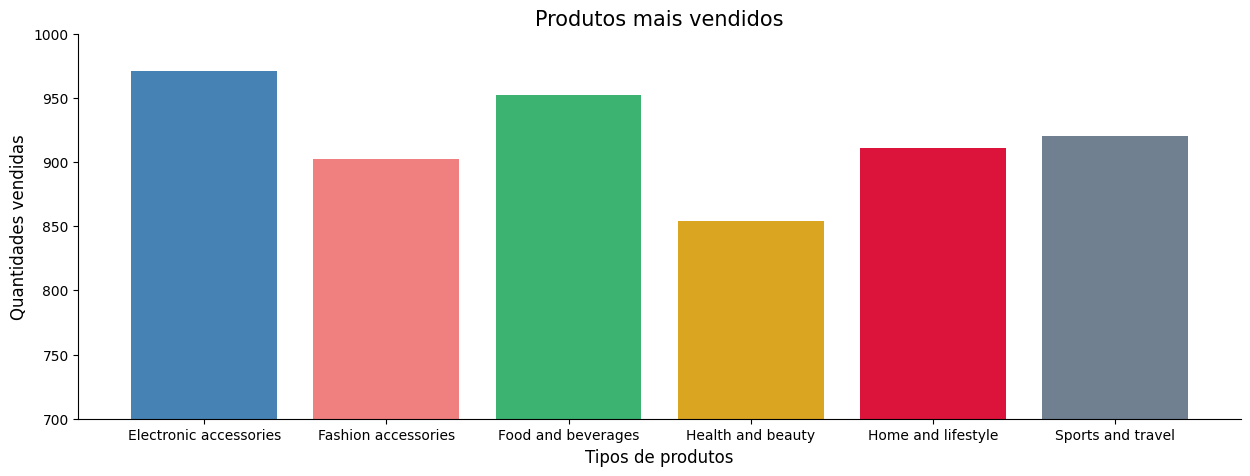

In [13]:
fig = plt.figure(figsize=(15,5))

cores = [ 
    "steelblue", 
    "lightcoral", 
    "mediumseagreen",
    "Goldenrod",
    "Crimson",
    "Slategray"]

plt.bar(df2['Product line'], df2['Quantity'], color = cores)
plt.ylim(700, 1000)
plt.ylabel("Quantidades vendidas", fontsize = 12)
plt.xlabel("Tipos de produtos", fontsize = 12)
plt.title("Produtos mais vendidos", fontsize = 15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Os produtos mais vendidos são:

1.Acessórios Eletrônicos - 971

2.Comidas e bebidas - 952

3.Esportes e Viagens - 920

4.Domésticos e Estilo de Vida - 911

5.Acessórios Fashion - 902

6.Saúde e Beleza - 854

Insights:
    
    -O tipo de produto menos vendido (Saúde e Beleza) é o tipo de produto mais procurado pelos homens.
    

# 3.Qual é o perfil dos clientes mais frequentes?

In [14]:
#Para responder essa pergunta, irei separar os clientes em 4 perfis(homens membros/homens normais/mulheres membros/mulheres normais)
homem_membro = df[(df['Gender'] == 'Male') & (df['Customer type'] == 'Member')]
homem_normal = df[(df['Gender'] == 'Male') & (df['Customer type'] == 'Normal')]
mulher_membro = df[(df['Gender'] == 'Female') & (df['Customer type'] == 'Member')]
mulher_normal = df[(df['Gender'] == 'Female') & (df['Customer type'] == 'Normal')]

In [15]:
num_mulher_membro = len(mulher_membro)
num_mulher_normal = len(mulher_normal)
num_homem_membro = len(homem_membro)
num_homem_normal = len(homem_normal)

contagem = [num_mulher_membro, num_mulher_normal, num_homem_membro, num_homem_normal]
nomes_index = ['Mulher Membro', 'Mulher Normal', 'Homem Membro', 'Homem Normal']
nome_col = ['Quantidade']

df_contagem = pd.DataFrame(contagem, index=nomes_index, columns=nome_col)
df3 = df_contagem.sort_values(by='Quantidade', ascending=False)
df3.reset_index(inplace=True)
df3.rename(columns={'index':'Perfil'}, inplace = True)

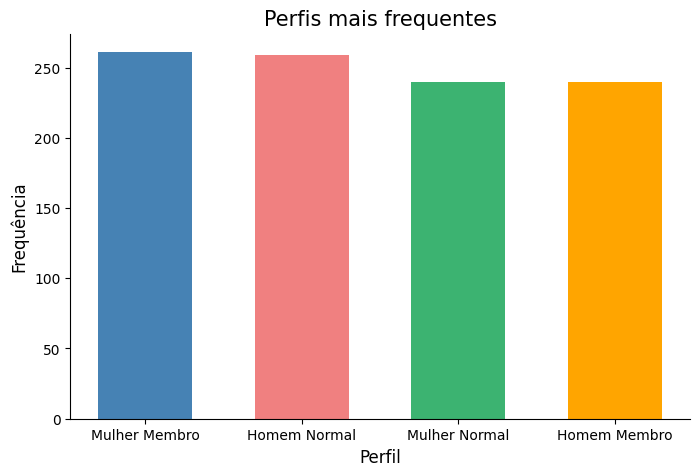

In [16]:
fig = plt.figure(figsize=(8,5))

cores = ['steelblue', 'lightcoral', 'mediumseagreen', 'orange']

plt.bar(df3['Perfil'], df3['Quantidade'], width = 0.6, color=cores)

plt.title('Perfis mais frequentes', fontsize =15)
plt.xlabel('Perfil', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Os perfis mais frequentes são:

1.Mulher Membro - 261

2.Homem Normal - 259

3.Mulher Normal - 240

4.Homem Membro - 240

Insights:
    
    -O número de clientes homens e mulheres são quase iguais. Logo, quando as mulheres vão comprar, elas compram em maior quantidade, visto que a grande maioria das vendas do supermercado foram para mulheres.
    
    -A maioria das mulheres que compram, são membros. Enquanto, a maioria dos homens são consumidores normais.
    
    -Creio que uma das razões pela que as mulheres compram em maior quantidade, sejam os benefícios de serem membros do     supermercado.

# 4.Qual é o desempenho de vendas por filial e cidade?

In [18]:
#Analisando o Datframe, percebemos que cada filial pertence a uma cidade:
#filial A- Yangon
#filial B- Mandalay
#filial C- Naypyitaw

df4 = df.groupby('Branch')['Quantity'].sum().reset_index()
df4.replace({'Branch': {'A': "Yangon", "B": "Mandalay", "C": "Naypyitaw"}}, inplace=True)
df4

,Branch,Quantity
0,Yangon,1859
1,Mandalay,1820
2,Naypyitaw,1831


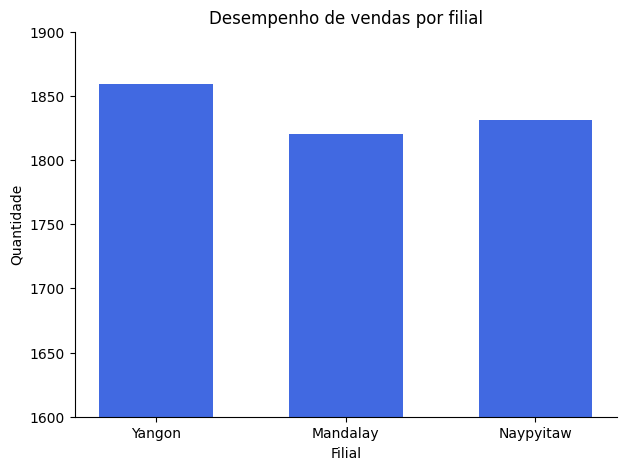

In [19]:
fig = plt.figure(figsize=(7,5))

fig.add_subplot()
plt.bar(df4['Branch'], df4['Quantity'], width = 0.6, color='Royalblue')
plt.ylim(1600,1900)

plt.xlabel("Filial")
plt.ylabel("Quantidade")
plt.title("Desempenho de vendas por filial")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show(fig)

Desempenho por filial:

1.Filial A(Yangon) - 1859

2.Filial C(Naypyitaw) - 1831

3.Filial B(Mandalay) - 1820



Insights:
    
    -As três filiais têm um desempenhos nas vendas muito semelhante.

# 5.Qual é o horário de pico das vendas? 

In [20]:
df['Horas'] = df['Time'].str.split(':').str[0]
contagem_hora = df['Horas'].value_counts().sort_index()
df5 = contagem_hora.reset_index().rename(columns={'Horas':'Horario', 'count': 'Quantidade'})
df5

,Horario,Quantidade
0,10,101
1,11,90
2,12,89
3,13,103
4,14,83
5,15,102
6,16,77
7,17,74
8,18,93
9,19,113


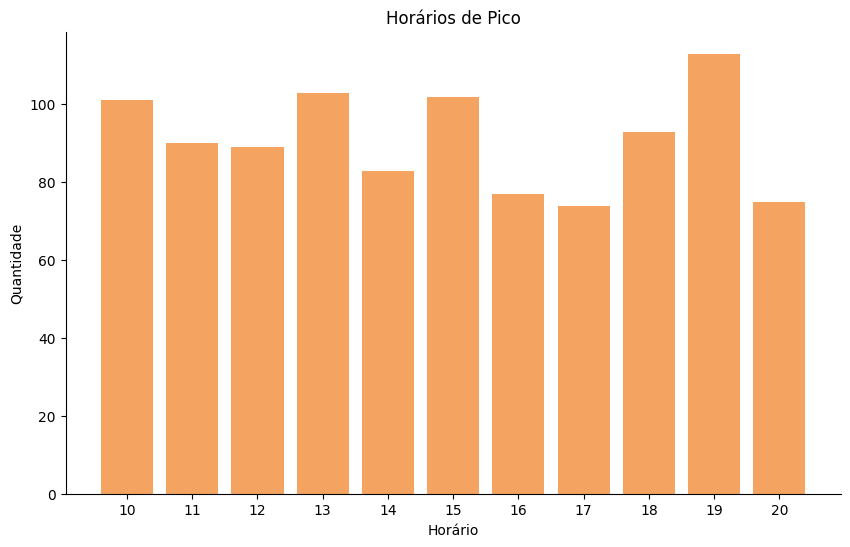

In [21]:
fig = plt.figure(figsize=(10,6))

plt.bar(df5['Horario'], df5['Quantidade'], width = 0.8, color='sandybrown')
plt.xlabel('Horário')
plt.ylabel('Quantidade')
plt.title('Horários de Pico')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Insights:
    
    -O horário de pico do supermercado é às 19:00, uma hora antes dele fechar.
    
    -Os horários que chegam perto do pico são às 13:00 e às 15:00. Porém às 14:00, o número de vendas cai bastante.

# 6.Como as vendas variam ao longo do tempo?

In [22]:
df['Mes'] = df['Date'].str.split('/').str[0].sort_values()
mes_quantidade = df.groupby('Mes')['Quantity'].sum()
df6 = mes_quantidade.reset_index()

mes_rename = {'1': 'Janeiro', '2': 'Fevereiro', '3':'Março'}

df6['Mes'] = df6['Mes'].map(mes_rename)

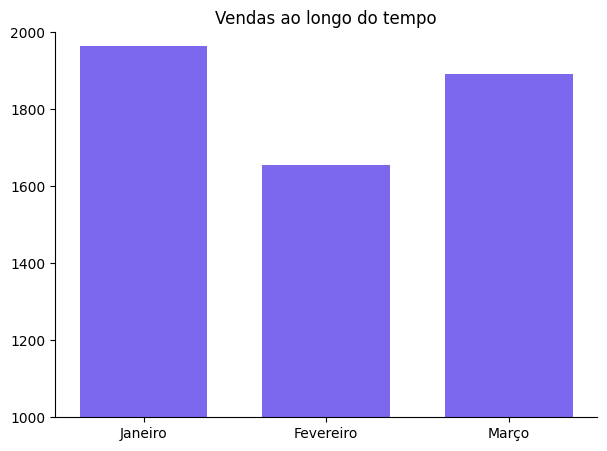

In [23]:
fig = plt.figure(figsize=(7,5))

plt.bar(df6['Mes'], df6['Quantity'], width = 0.7, color='Mediumslateblue')
plt.ylim(1000,2000)

plt.title("Vendas ao longo do tempo")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Vendas em cada mês:

    Janeiro-1965

    Fevereiro-1654

    Março-1891

Insights:
    
    -O mês com maior número de vendas foi Janeiro.
    
    -Em Fevereiro elas caíram bastante.
    
    -Porém, as vendas voltaram a subir em Março.

# 7.Quais métodos de pagamento são mais populares?

In [24]:
forma_pagamento = df['Payment'].value_counts()
df7 = forma_pagamento.reset_index().rename(columns={'Payment': 'Metodo', 'count':'Frequencia'})

pagamento_rename = {'Ewallet':'Carteira Eletrônica', 'Cash': 'Dinheiro', 'Credit card': 'Cartão de crédito'}

df7['Metodo'] = df7['Metodo'].map(pagamento_rename)

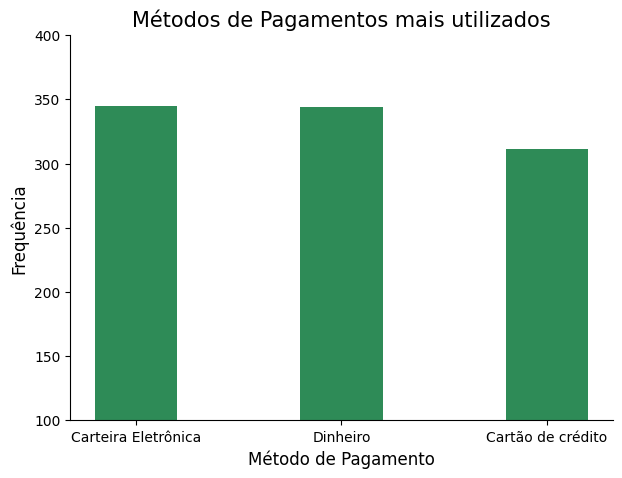

In [25]:
fig = plt.figure(figsize=(7,5))

plt.bar(df7['Metodo'], df7['Frequencia'], width = 0.4, color='seagreen')

plt.title("Métodos de Pagamentos mais utilizados", fontsize=15)
plt.xlabel('Método de Pagamento', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.ylim(100,400)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Métodos de Pagamentos mais populares:

1.Carteira Eletrônica - 345

2.Dinheiro - 344

3.Cartão de crédito - 311

Insights:
    
    -As vendas concretizadas por carteiras eletrônicas são quase iguais as feitas por dinheiro.
    
    -As compras feitas por cartão de crédito estão em menor quantidade comparada às outras.

# 8.Como o tipo de cliente afeta a receita média por venda?

In [32]:
df_membro = df.loc[df['Customer type'] == 'Member']
df_normal = df.loc[df['Customer type'] == 'Normal']

# Calcular receitas médias
receita_media_normal = df_normal['Total'].sum() / df_normal['Quantity'].sum()
receita_media_membro = df_membro['Total'].sum() / df_membro['Quantity'].sum()

# Adicionar colunas explicitamente
df_normal = df_normal.assign(Receita_Média_Normal=receita_media_normal)
df_membro = df_membro.assign(Receita_Média_Membro=receita_media_membro)

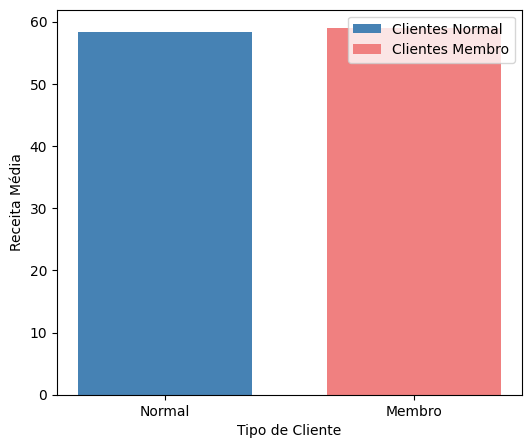

In [34]:
fig = plt.figure(figsize=(6, 5))

plt.bar(['Normal'], [receita_media_normal], 
        label="Clientes Normal", color='steelblue', width=0.7)

plt.bar(['Membro'], [receita_media_membro], 
        label="Clientes Membro", color='lightcoral', width=0.7)

plt.xlabel("Tipo de Cliente")
plt.ylabel("Receita Média")
plt.legend()
plt.show()

Insights:
    
    -Não há uma diferença significativa entre a receita média por venda dos dois tipos de cliente.